# Marketing campaigns: Email Advertising
### Oyundari Batbayar
****
The dataset is from Scikit Uplift package called Hillstrom dataset. https://www.uplift-modeling.com/en/latest/api/datasets/fetch_hillstrom.html

The objective is to answer the question of whether email marketing (Men's email and Women's email) affected their visits to the website.

Notebooks referred: 1) Causal ML examples from Uber and 2) https://towardsdatascience.com/a-story-of-treatment-and-response-63fd1fc80e27

# 1.Install and upgrade necessary packages

In [1]:
pip install --upgrade --quiet --quiet "pandas>=1.5.0,<2.1.4"

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
lida 0.0.10 requires fastapi, which is not installed.
lida 0.0.10 requires kaleido, which is not installed.
lida 0.0.10 requires python-multipart, which is not installed.
lida 0.0.10 requires uvicorn, which is not installed.
bigframes 0.20.1 requires scikit-learn>=1.2.2, but you have scikit-learn 1.0.2 which is incompatible.
causalml 0.14.1 requires pandas<1.4.0,>=0.24.1, but you have pandas 2.1.3 which is incompatible.
google-colab 1.0.0 requires pandas==1.5.3, but you have pandas 2.1.3 which is incompatible.


In [2]:
pip install --upgrade --quiet --quiet "scikit-learn>=1.2.2"

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
causalml 0.14.1 requires pandas<1.4.0,>=0.24.1, but you have pandas 2.1.3 which is incompatible.
causalml 0.14.1 requires scikit-learn<=1.0.2, but you have scikit-learn 1.4.0 which is incompatible.


In [3]:
pip install --quiet --quiet scikit-uplift

In [4]:
pip install --quiet --quiet causalml

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
lida 0.0.10 requires fastapi, which is not installed.
lida 0.0.10 requires kaleido, which is not installed.
lida 0.0.10 requires python-multipart, which is not installed.
lida 0.0.10 requires uvicorn, which is not installed.
bigframes 0.20.1 requires pandas<2.1.4,>=1.5.0, but you have pandas 1.3.5 which is incompatible.
bigframes 0.20.1 requires scikit-learn>=1.2.2, but you have scikit-learn 1.0.2 which is incompatible.
google-colab 1.0.0 requires pandas==1.5.3, but you have pandas 1.3.5 which is incompatible.
plotnine 0.12.4 requires pandas>=1.5.0, but you have pandas 1.3.5 which is incompatible.
xarray 2023.7.0 requires pandas>=1.4, but you have pandas 1.3.5 which is incompatible.


In [5]:
!pip install --upgrade --quiet --quiet causalml

# 2.Import other packages/libraries

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 3.Description of the Problem

The objective is to answer the question of whether email marketing (Men's email and Women's email) impacted the spending amount of these customers or their visits to the website.

## 3.1 Data Import

In [7]:
# Import Scikit Uplift package and fetch Hillstrom dataset
import sklift
from sklift.datasets import fetch_hillstrom
import sklearn.datasets as sdd

# Specify target column as 'visit'
hillstrom = fetch_hillstrom(target_col='visit', data_home=None, dest_subdir=None, download_if_missing=True, return_X_y_t=False)
hillstrom.keys()

dict_keys(['data', 'target', 'treatment', 'DESCR', 'feature_names', 'target_name', 'treatment_name'])

In [8]:
# Features of the Hillstrom dataset (My X)
hillstrom_features = hillstrom['data']
hillstrom_features.head(2)

,recency,history_segment,history,mens,womens,zip_code,newbie,channel
0,10,2) $100 - $200,142.44,1,0,Surburban,0,Phone
1,6,3) $200 - $350,329.08,1,1,Rural,1,Web


In [9]:
# Define Target
hillstrom_target = hillstrom['target']

# Define Treatment
hillstrom_treatment = hillstrom['treatment']
hillstrom_treatment.head(2)

0    Womens E-Mail
1        No E-Mail
Name: segment, dtype: object

## 3.2 Data Catalog

In [10]:
# Merge for data cataloging

# In case pandas is not imported
import pandas as pd

# Merge features, target, and treatment into one DataFrame
hillstrom_combined = pd.concat([hillstrom_features, hillstrom_target, hillstrom_treatment], axis=1)
hillstrom_combined = pd.DataFrame(hillstrom_combined)
hillstrom_combined.head()

,recency,history_segment,history,mens,womens,zip_code,newbie,channel,visit,segment
0,10,2) $100 - $200,142.44,1,0,Surburban,0,Phone,0,Womens E-Mail
1,6,3) $200 - $350,329.08,1,1,Rural,1,Web,0,No E-Mail
2,7,2) $100 - $200,180.65,0,1,Surburban,1,Web,0,Womens E-Mail
3,9,5) $500 - $750,675.83,1,0,Rural,1,Web,0,Mens E-Mail
4,2,1) $0 - $100,45.34,1,0,Urban,0,Web,0,Womens E-Mail


In [11]:
# Add descriptions
descriptions = {
    'recency': 'Months since last purchase',
    'history_segment': 'Categorization of dollars spent in the past year',
    'history': 'Actual dollar value spent in the past year',
    'mens': '1/0 indicator, 1 = customer purchased Mens merchandise in the past year',
    'womens': '1/0 indicator, 1 = customer purchased Womens merchandise in the past year',
    'zip_code': 'Classifies zip code as Urban, Suburban, or Rural',
    'newbie': '1/0 indicator, 1 = New customer in the past twelve months',
    'channel': 'Describes the channels the customer purchased from in the past year',
    'visit': '1/0 indicator, 1 = Customer visited website in the following two weeks',
    'segment': '1/3 were randomly chosen to receive an e-mail campaign featuring Mens merchandise, 1/3 were randomly chosen to receive an e-mail campaign featuring Womens merchandise, 1/3 were randomly chosen to not receive an e-mail campaign'
}

# Create a data catalog
data_catalog = pd.DataFrame({
    'Variable Name': hillstrom_combined.columns,
    'Data Type': [str(hillstrom_combined[col].dtype) for col in hillstrom_combined.columns],
    'Description': [descriptions.get(col, 'No description available') for col in hillstrom_combined.columns]
})

# Set display options to show full descriptions
pd.set_option('display.max_colwidth', None)

# Display the data catalog with descriptions
print(data_catalog)

     Variable Name Data Type  \
0          recency     int64   
1  history_segment    object   
2          history   float64   
3             mens     int64   
4           womens     int64   
5         zip_code    object   
6           newbie     int64   
7          channel    object   
8            visit     int64   
9          segment    object   

                                                                                                                                                                                                                          Description  
0                                                                                                                                                                                                          Months since last purchase  
1                                                                                                                                                                                    Ca

# 4.Data Exploration

## 4.1 Pre-requisites

### 4.1.1 Custom Functions for Visuals

Description: To display the proportions of successes (visits) per treatment

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# A function for pie plots - to display the proportion of successes (e.g., visits) per treatment
def pie_plots(data, treatment_name, target_name):
    """
    This function generates pie plots to display the proportion of successes (e.g., visits)
    per treatment category within the provided dataset.

    Parameters:
    - data (DataFrame): The dataset containing the treatment and target columns.
    - treatment_name (str): The name of the column in 'data' representing different treatments.
    - target_name (str): The name of the column in 'data' representing the target variable (e.g., visit/no visit).

    The function creates a subplot for each unique treatment in the dataset plus an additional
    subplot that aggregates all treatments. Each pie chart displays the percentage of the target
    variable categories for the corresponding treatment.
    """

    # Retrieve unique treatments
    treatments = data[treatment_name].unique()
    # Parameters for 'exploding' slices out of the pie
    explode = (0, 0.1)
    # Dynamically determine subplot grid size based on the number of treatments
    n_treatments = len(treatments) + 1  # +1 for the 'All treatments' category
    cols = min(n_treatments, 4)  # Set the maximum number of columns
    rows = n_treatments // cols + (n_treatments % cols > 0)  # Calculate the required number of rows

    # Initialize subplot with dynamic size based on the number of treatments
    fig, axes = plt.subplots(rows, cols, figsize=(5 * cols, 5 * rows))
    fig.set_facecolor("snow")

    # Convert axes to a flattened array for easy iteration
    axes = axes.flatten()

    # Define consulting colors
    slice_colors = ["lightskyblue", "lightgrey"]  # Soft blue and grey for slices

    # Pie chart for all treatments combined
    axes[0].pie(
        data.groupby(target_name)[treatment_name].count(),
        explode=explode,
        labels=["no visit", "visit"],
        colors=slice_colors,  # Using consulting colors
        autopct='%1.0f%%',
        shadow=True,
        startangle=90,
        textprops={'fontsize': 14}
    )
    axes[0].set_title('All treatments')

    # Pie charts for each treatment
    for i, treatment in enumerate(treatments, start=1):
        axes[i].pie(
            data[data[treatment_name] == treatment].groupby(target_name)[treatment_name].count(),
            explode=explode,
            labels=["no visit", "visit"],
            colors=slice_colors,  # Using consulting colors
            autopct='%1.0f%%',
            shadow=True,
            startangle=90,
            textprops={'fontsize': 14}
        )
        axes[i].set_title(treatment)

    # If there are empty subplots, hide them
    for j in range(i + 1, rows * cols):
        axes[j].axis('off')

    # Adjust layout to prevent overlapping
    plt.tight_layout()
    plt.show()

def plot_categorical(data):
    '''
    This function creates count plots for categorical features in the dataset, split by the 'visit'
    status. It visualizes the distribution of different categorical features such as 'channel',
    'gender', 'zip_code', and 'newbie', showing how many entries fall into each category,
    separated by the visit outcome.

    The dataset is expected to have been preprocessed with `_cat_gender()` and `map_visit()`
    functions, the implementation of which is not shown in the provided code.

    The function sets a seaborn theme for the plots and generates a 2x2 grid of count plots with
    customized colors.
    '''
    data = _cat_gender(data)
    data['visit'] = map_visit(data['visit'])
    custom_params = {"axes.spines.right": False, "axes.spines.top": False}
    sns.set_theme(style="whitegrid", rc=custom_params)
    fig, axes = plt.subplots(2, 2, figsize=(15, 11))
    fig.set_facecolor("snow")
    fig.suptitle("Categorical Features", y=0.94)

    sns.countplot(
        x="channel",
        hue="visit",
        data=data,
        ax=axes[0, 0],
        palette=sns.color_palette(["lightsteelblue", "green"]),
    )
    sns.countplot(
        x="gender",
        hue="visit",
        data=data,
        ax=axes[0, 1],
        palette=sns.color_palette(["lightsteelblue", "green"]),
    )
    axes[0, 1].set_xticklabels(["women", "men"])

    sns.countplot(
        x="zip_code",
        hue="visit",
        data=data,
        ax=axes[1, 0],
        palette=sns.color_palette(["lightsteelblue", "green"]),
    )
    sns.countplot(
        x="newbie",
        hue="visit",
        data=data,
        ax=axes[1, 1],
        palette=sns.color_palette(["lightsteelblue", "green"]),
    )
    axes[1, 1].set_xticklabels(["no newbie", "newbie"])

    plt.tight_layout()
    plt.show()

def plot_continuous(data):
    """
    This function generates histograms for continuous features in the dataset, separated by the
    'visit' status. It visualizes the distribution of the 'recency' and 'history' features,
    showing the counts or dollar amounts spent for the categories 'no visit' and 'visit'.

    The function sets a seaborn theme for the plots and generates a 1x2 grid of histograms with
    stacked bars, displaying the distribution of each feature for both 'no visit' and 'visit'
    outcomes.
    """
    x = data[data["visit"] == 'no visit']["recency"]
    y = data[data["visit"] == 'visit']["recency"]

    xx = data[data["visit"] == 'no visit']["history"]
    yy = data[data["visit"] == 'visit']["history"]

    fig, axes = plt.subplots(1, 2, figsize=(10, 5))
    fig.set_facecolor("snow")
    fig.suptitle("Continuous Features")

    axes[0].hist(
        (x, y),
        histtype="bar",
        stacked=True,
        color=("lightsteelblue", "green"),
        label=("no visit", "visit"),
    )
    axes[0].set_title("recency")
    axes[0].legend()
    axes[0].set_ylabel('count')
    axes[1].hist(
        (xx, yy),
        histtype="bar",
        stacked=True,
        color=("lightsteelblue", "green"),
        label=("no visit", "visit"),
    )
    axes[1].set_title("history")
    axes[1].legend()
    axes[1].set_ylabel('dollars spent')

    plt.show()

### 4.1.2 Custom Functions for Preprocessing

In [13]:
def _cat_gender(data):
    '''map of the two columns "mens" and "womens" to a column "gender" with 0, 1 for women, men, respectively'''
    data["gender"] = 1
    data.loc[data["mens"] == 1, "gender"] = 2
    return data

def map_visit(series):
    '''maps 0, 1 to "no visit", "visit", respectively'''
    map_visit = {0:'no visit', 1: 'visit'}
    return series.map(map_visit)

## 4.2 Data Visualization

### 4.2.1 Pie Plots for Treatment and Visit

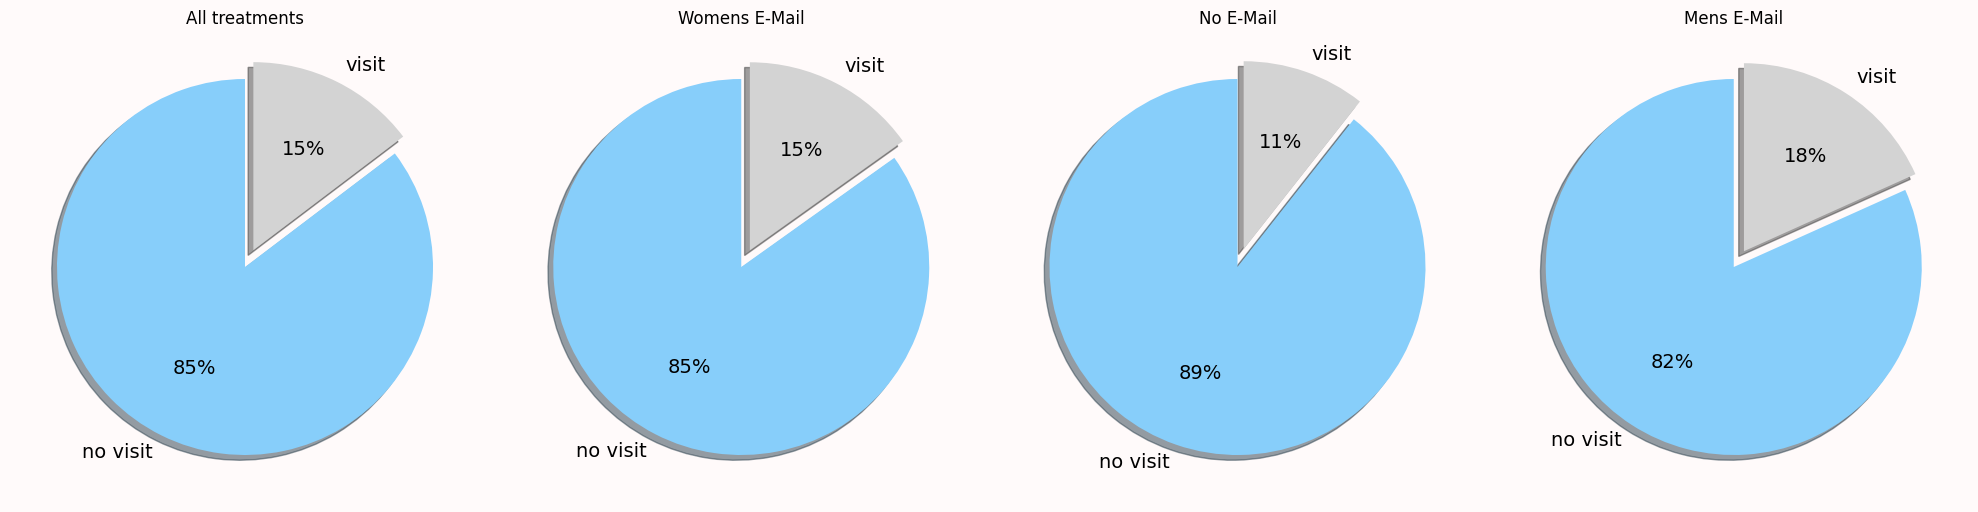

In [14]:
df_hillstrom = pd.concat([hillstrom_features,hillstrom_treatment,hillstrom_target], axis = 1)
pie_plots(df_hillstrom, 'segment', 'visit')

From an initial observation, it looks like men's email was the most successsful intervention, leading to 18% visits to the website. Overall, the intervention does not seem to be working well since the percentages are small for all. This leaves a very uneven distribution of "visit/no visit" which will impact the ML models.

### 4.2.2 Bar Charts for Categorical Features

<ipython-input-12-98539a0ccf7e>:109: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[0, 1].set_xticklabels(["women", "men"])
<ipython-input-12-98539a0ccf7e>:125: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[1, 1].set_xticklabels(["no newbie", "newbie"])


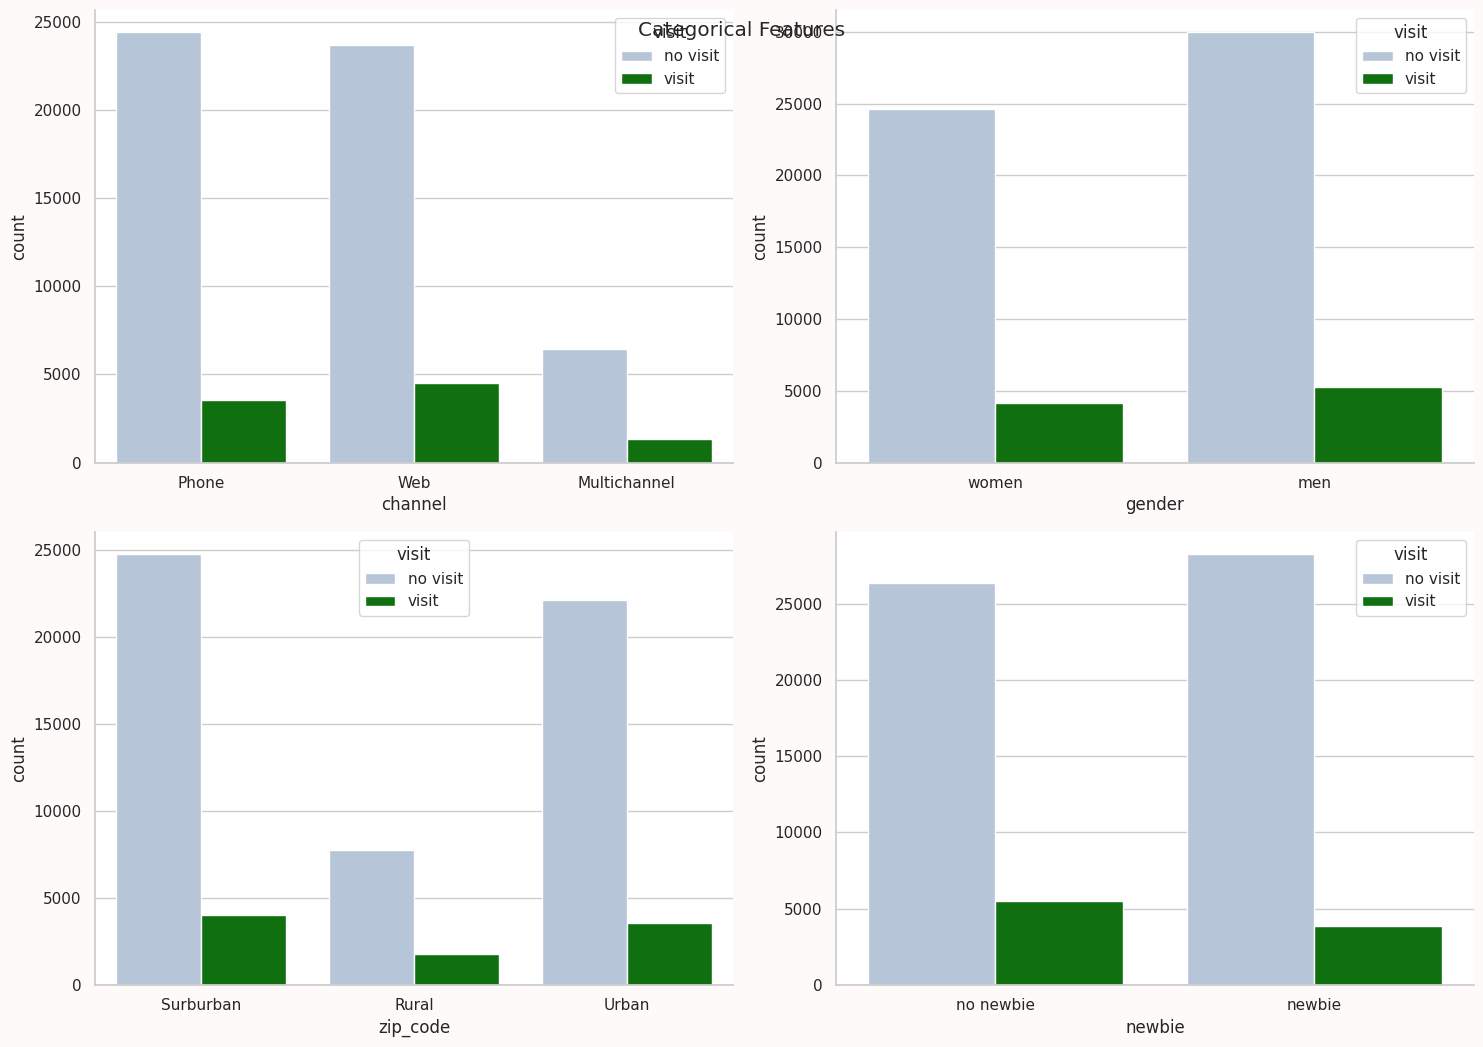

In [15]:
plot_categorical(df_hillstrom)

The uneven distribution is observed across all other categories, as expected.

### 4.2.3 Bar Charts for Continuous Features

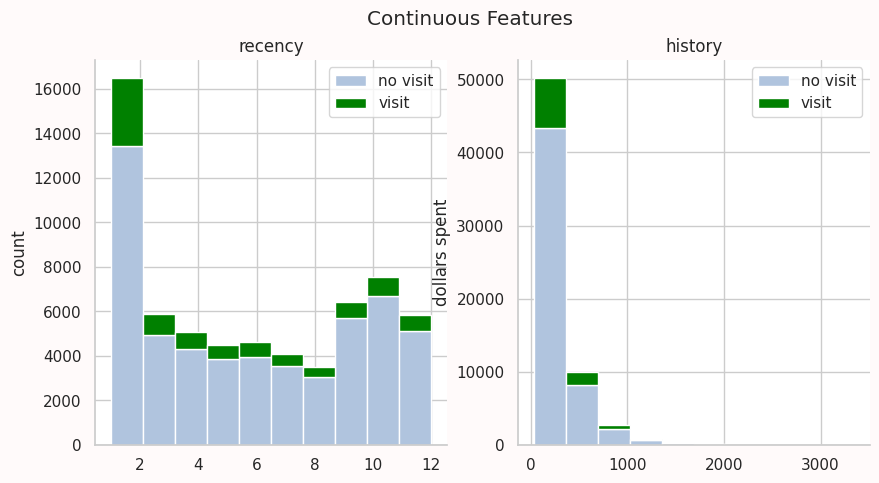

In [16]:
plot_continuous(df_hillstrom)

Similarly, with continuous variables, recency and history

# 5.Feature Engineering

In [17]:
!pip install feature_engine
import feature_engine as fe
import feature_engine.selection as fe

hillstrom_features = fe.SmartCorrelatedSelection(variables=None).fit_transform(hillstrom_features)

In [18]:
# Looking at the features once more
hillstrom_features.head(2)

,recency,history_segment,history,mens,zip_code,newbie,channel
0,10,2) $100 - $200,142.44,1,Surburban,0,Phone
1,6,3) $200 - $350,329.08,1,Rural,1,Web


## 5.1 Custom Functions for Feature Engineering

In [19]:
import pandas as pd
import numpy as np


def treatment_category(
    series:pd.Series
    )-> pd.Series:
    '''maps 'No E-Mail', 'Womens E-Mail','Mens E-Mail' onto 0, 1, 2

    Parameters:
    -----------
    series: pandas series

    Returns:
    --------
    a series with mapped entries
    '''
    treatments = ['No E-Mail', 'Womens E-Mail','Mens E-Mail']
    dictionary = dict(zip(treatments, list(range(3))))
    return series.map(dictionary)


def standardise(
    series:pd.Series
    )->pd.Series:
    '''
    standardises column *1/2

    Parameters:
    -----------
    series: pandas series

    Returns:
    --------
    a series with standardises entries
    '''
    mean = np.mean(series)
    std = np.std(series)
    return (series-mean)/(std*2)

def get_features2(
    df:pd.DataFrame
    )->pd.DataFrame:
    '''
    takes features and one-hot-encodes them. if include_treatment is True,
    treatment column will be added to features

    Parameters:
    -----------
    df: pandas DataFrame

    include_treatment: cool
        default = False
        if True: column 'segment' will be hot-encoded

    Returns:
    --------
    pandas DataFrame
    '''
    features1 = ['mens', 'womens', 'newbie']
    features2 = [  'zip_code', 'channel']
    df[features1+features2] = df[features1+features2].astype('category')
    dummy_features = pd.get_dummies(df[features2])
    df.drop(columns = features2, inplace = True)
    df = pd.concat([df,dummy_features], axis = 1)


    return df

def get_features(
    df:pd.DataFrame
    )->pd.DataFrame:
    '''
    takes features and one-hot-encodes them. if include_treatment is True,
    treatment column will be added to features

    Parameters:
    -----------
    df: pandas DataFrame

    include_treatment: cool
        default = False
        if True: column 'segment' will be hot-encoded

    Returns:
    --------
    pandas DataFrame
    '''
    features = [  'zip_code', 'channel']
    df[features] = df[features].astype('category')
    dummy_features = pd.get_dummies(df[features])
    df.drop(columns = features, inplace = True)
    df = pd.concat([df,dummy_features], axis = 1)


    return df


def feature_engineering(
    df:pd.DataFrame
    )->pd.DataFrame:
    '''
    performs all necessary feature engineering tasks

    Parameters:
    -----------
    df: pandas DataFrame

    include_treatment: cool
        default = False
        if True: column 'segment' will be hot-encoded

    Returns:
    --------
    pandas DataFrame
    '''
    #df.drop(columns= ['history_segment'], inplace = True)

    df['recency'] = standardise(df['recency'])
    df['history'] = standardise(df['history'])

    df = get_features(df)

    return df

In [20]:
# Looking at target and treatment once more
hillstrom_target = hillstrom['target']
hillstrom_treatment = hillstrom['treatment']
hillstrom_treatment.head(2)

0    Womens E-Mail
1        No E-Mail
Name: segment, dtype: object

In [21]:
# Apply feature_engineering function to hillstrom_features which standardizes recency and history
hillstrom_features_explore = feature_engineering(hillstrom_features)
hillstrom_features_explore.head(2)

,recency,history_segment,history,mens,newbie,zip_code_Rural,zip_code_Surburban,zip_code_Urban,channel_Multichannel,channel_Phone,channel_Web
0,0.603876,2) $100 - $200,-0.194501,1,0,0,1,0,0,1,0
1,0.033679,3) $200 - $350,0.169807,1,1,1,0,0,0,0,1


In [22]:
# Apply treatment_category function to hillstrom_treatment which maps 'No E-Mail', 'Womens E-Mail','Mens E-Mail' onto 0, 1, 2
hillstrom_treatment_explore = treatment_category(hillstrom_treatment)
hillstrom_treatment_explore.head(2)

0    1
1    0
Name: segment, dtype: int64

# 6.Causal Inference

1. Making Learner Experiments (S, T learner)

2. Doing the analysis of Treatment Effect

3. Analyzing the feature Importance


Experiment with at least following 2:
LRSRegressor -spend
XGBTRegressor - spend
For classification problems use the Classifiers (e.g. UpliftTreeClassifier) - visit
Plot feature importance
Analyze the result and explain in the notebook

<p><h3><b>S-Learner and T-Learner </b></h3></p>
Meta-learners are frameworks to estimate the Conditional Average Treatment Effect (CATE) or "Uplift" using any machine learning estimators.
The following explanations assume binary treatment options.
<p><h4><b>S-Learner:</b></h4></p>
<p>Contrary to the T-learner, the S-learner uses only one machine learning model (single base).
$$
\mu = E[Y|X=x, W=w]
$$
with $\mu$ being average outcome, $Y$ the outcome, $X$ the covariate, and $W$ the treatment effect.</p>
<p>The CATE is </p>
$$\tau(x) = \hat{\mu}(x,w = 1) - \hat{\mu}(x,w = 0).$$
<p><h4><b>T-Learner:</b></h4></p>
<p>The T-learner uses a model for each treatment option:
$$\mu_{0} = E[Y(0)|X=x],\quad \mu_{1} = E[Y(1)|X=x]$$.</p>
<p>The CATE is $\tilde{\tau} = \mu_{1}(x) - \mu_{0}(x)$.</p>


## 6.1 Uplift Trees with UpliftRandomForestClassifier and UpliftTreeClassifier

The following was done by following the documentation example here: https://causalml.readthedocs.io/en/latest/examples/uplift_tree_visualization.html#One-Control-+-Multiple-Treatments

In [23]:
# Import necessary packages

from causalml.inference.tree import UpliftRandomForestClassifier
from causalml.metrics import plot_gain
from sklearn.model_selection import train_test_split

ERROR:duecredit:Failed to import duecredit due to No module named 'duecredit'


In [24]:
# Features
hillstrom_combined = hillstrom['data']

# Define target
hillstrom_combined['target'] = hillstrom_target

# Define treatment
hillstrom_combined['treatment'] = hillstrom_treatment

# See the combined dataset
hillstrom_combined = pd.DataFrame(hillstrom_combined)
hillstrom_combined.head()

,recency,history_segment,history,mens,womens,zip_code,newbie,channel,target,treatment
0,10,2) $100 - $200,142.44,1,0,Surburban,0,Phone,0,Womens E-Mail
1,6,3) $200 - $350,329.08,1,1,Rural,1,Web,0,No E-Mail
2,7,2) $100 - $200,180.65,0,1,Surburban,1,Web,0,Womens E-Mail
3,9,5) $500 - $750,675.83,1,0,Rural,1,Web,0,Mens E-Mail
4,2,1) $0 - $100,45.34,1,0,Urban,0,Web,0,Womens E-Mail


In [25]:
# Split into train and test sets

df_train, df_test = train_test_split(hillstrom_combined, test_size=0.3, random_state=111)

In [26]:
# See a few observations from the train set
df_train.head()


,recency,history_segment,history,mens,womens,zip_code,newbie,channel,target,treatment
18431,4,1) $0 - $100,94.67,1,0,Surburban,0,Web,0,Womens E-Mail
62340,4,4) $350 - $500,421.05,1,1,Surburban,0,Web,0,No E-Mail
61435,6,1) $0 - $100,31.52,1,0,Urban,0,Web,0,Mens E-Mail
29576,4,1) $0 - $100,90.99,1,0,Urban,1,Phone,0,Mens E-Mail
61975,3,4) $350 - $500,430.63,1,1,Urban,0,Multichannel,0,Mens E-Mail


In [27]:
# Import relevant libraries
import pandas as pd
import numpy as np

# Apply treatment mapping
#df_train['treatment'] = treatment_category(df_train['treatment'])

# Apply feature engineering (defined before as a function)
df_train = feature_engineering(df_train)

# Check the first few rows to confirm changes
print(df_train.head(2))


        recency history_segment   history  mens  womens  newbie  target  \
18431 -0.250847    1) $0 - $100 -0.287823     1       0       0       0   
62340 -0.250847  4) $350 - $500  0.349163     1       1       0       0   

           treatment  zip_code_Rural  zip_code_Surburban  zip_code_Urban  \
18431  Womens E-Mail               0                   1               0   
62340      No E-Mail               0                   1               0   

       channel_Multichannel  channel_Phone  channel_Web  
18431                     0              0            1  
62340                     0              0            1  


In [28]:
# Import UpliftTreeClassifer
from causalml.inference.tree import UpliftTreeClassifier

In [29]:
# Prepare features and target variable
X = df_train.drop(['target', 'treatment', 'history_segment'], axis=1)  # Drop the target and treatment and unnecessary column 'history_segment' to leave only features
y = df_train['target']  # This is my  target variable
treatment = df_train['treatment']  # This is for treatment received

# See data type of X (features, in other words, confounding factors)
X.dtypes

# Convert to float
X = X.astype(float)

# Confirm changes
X.dtypes


recency                 float64
history                 float64
mens                    float64
womens                  float64
newbie                  float64
zip_code_Rural          float64
zip_code_Surburban      float64
zip_code_Urban          float64
channel_Multichannel    float64
channel_Phone           float64
channel_Web             float64
dtype: object

In [30]:
# Initialize the classifier

clf = UpliftTreeClassifier(max_depth = 3, min_samples_leaf = 200, min_samples_treatment = 50, n_reg = 100, evaluationFunction='KL', control_name='No E-Mail')

# Fit the model
clf.fit(X=X.values,
        treatment=treatment.values,
        y=y.values)

# Test it on the test set
X_test = df_test.drop(['target', 'treatment', 'history_segment'], axis=1)

# Apply same feature engineering to the test set
X_test = feature_engineering(X_test)

# Predict the uplift
uplift_predictions = clf.predict(X_test.values)

In [31]:
# Print uplift predictions
uplift_predictions

array([[0.14239321, 0.21089109, 0.21047406],
       [0.11604616, 0.18066384, 0.12055208],
       [0.11604616, 0.18066384, 0.12055208],
       ...,
       [0.0826002 , 0.17147588, 0.1589889 ],
       [0.14239321, 0.21089109, 0.21047406],
       [0.06791569, 0.14252661, 0.08657407]])

In [32]:
# Let's see it as a pandas dataframe
df_res = pd.DataFrame(uplift_predictions, columns=clf.classes_)
df_res.head()

,No E-Mail,Mens E-Mail,Womens E-Mail
0,0.142393,0.210891,0.210474
1,0.116046,0.180664,0.120552
2,0.116046,0.180664,0.120552
3,0.142393,0.210891,0.210474
4,0.067916,0.142527,0.086574


###**Interpretation**

Each row in the table above represents a prediction for an individual, and each column corresponds to control and treatment groups. The values are probabilities that indicate the **expected uplift** (increased likelihood of a desired outcome, in this case, visiting the website) due to the treatment for each individual. These probabilities are the model's estimates of how likely it is that the person will exhibit the desired behavior (such as making a purchase) if they are in the given treatment group compared to if they were in the control group ("No E-Mail").

Let's look at observation (the first row) '0':

* **No E-Mail:** 0.142393 - This is the baseline probability for the control group. It represents the likelihood of the desired outcome happening without any email being sent.

* **Mens E-Mail:** 0.210891 - This is the probability of uplift due to the "Mens E-Mail" treatment. This number suggests that this individual is predicted to have a 21.09% higher likelihood of the desired outcome if they receive the men's email compared to no email.

* **Womens E-Mail:** 0.210474 - Similarly, this is the uplift probability for the "Womens E-Mail" treatment. The prediction here is a 21.05% higher likelihood of the desired outcome for this individual if they receive the women's email.

The same interpretation would apply to the other rows, with each row representing a different individual's uplift probabilities for each treatment type. These probabilities help in decision-making, for example, to determine which type of email (men's or women's) to send to each individual to maximize the desired outcome.

In practice, the treatment with the highest probability might be chosen for each individual to optimize the overall response from a campaign. However, it's also important to consider the cost of each treatment and the overall strategy when making decisions based on uplift modeling.

**Important Note:**

The UplifTreeClassifier will use these parameters to attempt to find the best splits that separate individuals into groups that have the highest difference in outcomes between the treatment and control groups, which is essentially the uplift.

However, when dealing with multiple treatments, it seems to be important to ensure that the analysis takes into account the complexity of interpreting the results. Multiple treatments can interact with one another, and the uplift from each treatment isn't independent of the others. It may be necessary to look at not just the individual uplifts, but also the interactions between different treatments.





In [33]:
# Let's try it out with RandomForestClassifier
uplift_model = UpliftRandomForestClassifier(max_depth = 3, min_samples_leaf = 200, min_samples_treatment = 50, n_reg = 100, evaluationFunction='KL', control_name='No E-Mail')

In [34]:
# Fit the model
uplift_model.fit(X=X.values,
        treatment=treatment.values,
        y=y.values)

In [35]:
# Check data types of X (features, in other words, confounding variables)
X_test.dtypes

recency                 float64
history                 float64
mens                      int64
womens                    int64
newbie                    int64
zip_code_Rural            uint8
zip_code_Surburban        uint8
zip_code_Urban            uint8
channel_Multichannel      uint8
channel_Phone             uint8
channel_Web               uint8
dtype: object

In [36]:
# Predict
y_pred = uplift_model.predict(X_test.values)

In [37]:
# Conver to pandas dataframe
result = pd.DataFrame(y_pred,
                      columns=uplift_model.classes_[1:])
result.head()

,Mens E-Mail,Womens E-Mail
0,0.076920,0.040658
1,0.074479,0.010874
2,0.073711,0.013259
3,0.070924,0.077171
4,0.075620,0.012792


Men's E-Mail Column: The scores in this column predict how much more likely each individual is to achieve the desired outcome after receiving the men's merchandise email campaign, compared to not receiving any email.

For example, the first individual (row 0) has an uplift score of 0.082862, which suggests that sending the men's email to this person would increase the likelihood of the desired outcome by approximately 8.29%.
Women's E-Mail Column: The scores in this column predict how much more likely each individual is to achieve the desired outcome after receiving the women's merchandise email campaign, compared to not receiving any email.

For example, the first individual (row 0) has an uplift score of 0.040315, which suggests that sending the women's email to this person would increase the likelihood of the desired outcome by approximately 4.03%.
If we interpret the first five rows, we can make several observations:

Individuals 0, 1, 3, and 4 all have positive uplift scores for both email campaigns, suggesting they are likely to respond positively to either campaign. However, the scores are generally higher for the "Men's E-Mail" campaign, which **might** suggest that, on average, these individuals would respond more favorably to the men's merchandise.

Individual 2 presents a bit of an anomaly with a positive score for "Men's E-Mail" (0.058539) and a negative score for "Women's E-Mail" (-0.004714). This indicates that sending the men's email campaign might be beneficial for this individual, while the women's email campaign might actually have a slightly negative impact on the likelihood of achieving the desired outcome compared to sending no email at all.

The negative score for the "Women's E-Mail" for individual 2 suggests that for some individuals, certain campaigns could have a deterrent effect. This underscores the importance of targeted marketing campaigns: by identifying which individuals are more likely to respond to which type of campaign, we can more effectively allocate marketing resources and potentially increase the overall campaign success.

### **Multi-Treatment Meta-Learner ATE**

In [38]:
from causalml.inference.meta import BaseSClassifier
from sklearn.ensemble import RandomForestClassifier
from scipy.stats import ttest_ind
import pandas as pd


# Initialize the multi-treatment meta-learner
model = BaseSClassifier(learner=RandomForestClassifier(), control_name='No E-Mail')

# Fit the model
model.fit(X=X, treatment=treatment, y=y)

# Estimate the Average Treatment Effects (ATEs)
ates = model.estimate_ate(X=X, treatment=treatment, y=y)

# Print the ATEs
ates

array([0.07466744, 0.04445238])

**Interpretation of ATEs**

Men's Email (First Treatment ATE: 0.07403696): Men who received the targeted email were, on average, approximately 7.40% more likely to visit the website compared to men who did not receive the email (or compared to the control condition).

Women's Email (Second Treatment ATE: 0.04394647): Women who received the targeted email were, on average, approximately 4.39% more likely to visit the website compared to women who did not receive the email (or compared to the control condition).

However, it's important to check their statistical significance, also noting that the number of people who visited the website (target variable) was low.

## 6.2 Uplift Tree

In [39]:
# Train uplift tree
uplift_model = UpliftTreeClassifier(max_depth = 3, min_samples_leaf = 200, min_samples_treatment = 50, n_reg = 100, evaluationFunction='KL', control_name='No E-Mail')

uplift_model.fit(X=X.values,
        treatment=treatment.values,
        y=y.values)

In [40]:
from causalml.dataset import make_uplift_classification
from causalml.inference.tree import UpliftTreeClassifier, UpliftRandomForestClassifier
from causalml.inference.tree import uplift_tree_string, uplift_tree_plot

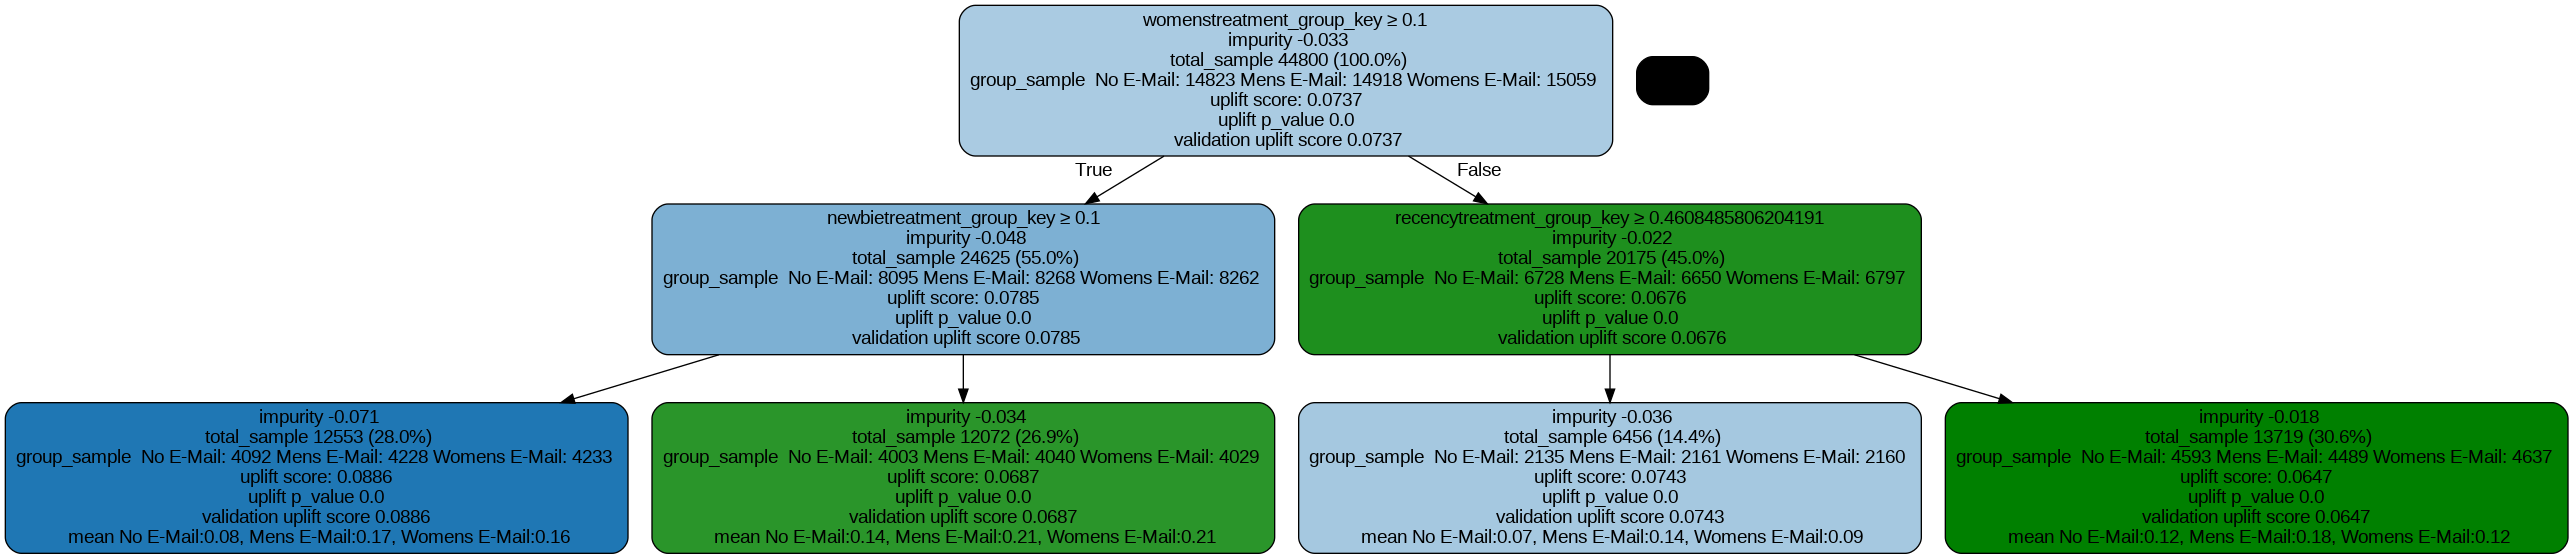

In [41]:
# Plot uplift tree
# The uplift score represents the best uplift score among all treatment effects
# Drop rows with missing values
X = X.dropna()
graph = uplift_tree_plot(uplift_model.fitted_uplift_tree, X.columns)
from IPython.display import Image
Image(graph.create_png())

### **Interpretation**

* **Women's E-Mail**: In the first split (left node), the Women's E-Mail segment has an uplift score of 0.16, which is the highest single value on the tree. This suggests that women receiving emails represent a segment that responds very positively to the treatment.

* **Men's E-Mail in Newbie Treatment Group**: In the second split on the left (newbietreatment_group_key ≥ 0.1), Men's E-Mail has an uplift score of 0.21, which is even higher than the Women's E-Mail score in the first split. This indicates that men who are newbies and receive emails are another highly positively affected segment.

* **Women's E-Mail in Recency Treatment Group**: In the second split on the right (recencytreatment_group_key ≥ 0.46), Women's E-Mail has an uplift score of 0.09, which is lower than the previous segments but still positive.

In summary, **the segments most positively affected by the treatments are women receiving emails in general and men who are new to the treatment group receiving emails, as they have the highest uplift scores.** However, it is important to also consider the validation uplift scores, which should ideally be consistent with the initial uplift scores to confirm these findings.

Source: https://causalml.readthedocs.io/en/latest/examples/uplift_tree_visualization.html

## 6.3 Feature Importance

In [42]:
# Importing some libraries - not all of them are used

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

from causalml.inference.meta import BaseSRegressor, BaseTRegressor, BaseXRegressor, BaseRRegressor
from causalml.inference.tree import UpliftTreeClassifier, UpliftRandomForestClassifier
from causalml.dataset.regression import synthetic_data
from sklearn.linear_model import LinearRegression

import shap
import matplotlib.pyplot as plt

import time
from sklearn.inspection import permutation_importance
from sklearn.model_selection import train_test_split

import os
import warnings
warnings.filterwarnings('ignore')

os.environ['KMP_DUPLICATE_LIB_OK'] = 'True'  # for lightgbm to work

%reload_ext autoreload
%autoreload 2
%matplotlib inline

### S-Learner

[LightGBM] [Info] Number of positive: 4282, number of negative: 25459
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000693 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 288
[LightGBM] [Info] Number of data points in the train set: 29741, number of used features: 12
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.143976 -> initscore=-1.782649
[LightGBM] [Info] Start training from score -1.782649
[LightGBM] [Info] Number of positive: 3853, number of negative: 26029
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000689 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 288
[LightGBM] [Info] Number of data points in the train set: 29882, number of used features: 12
[LightGBM] [Info] [bin

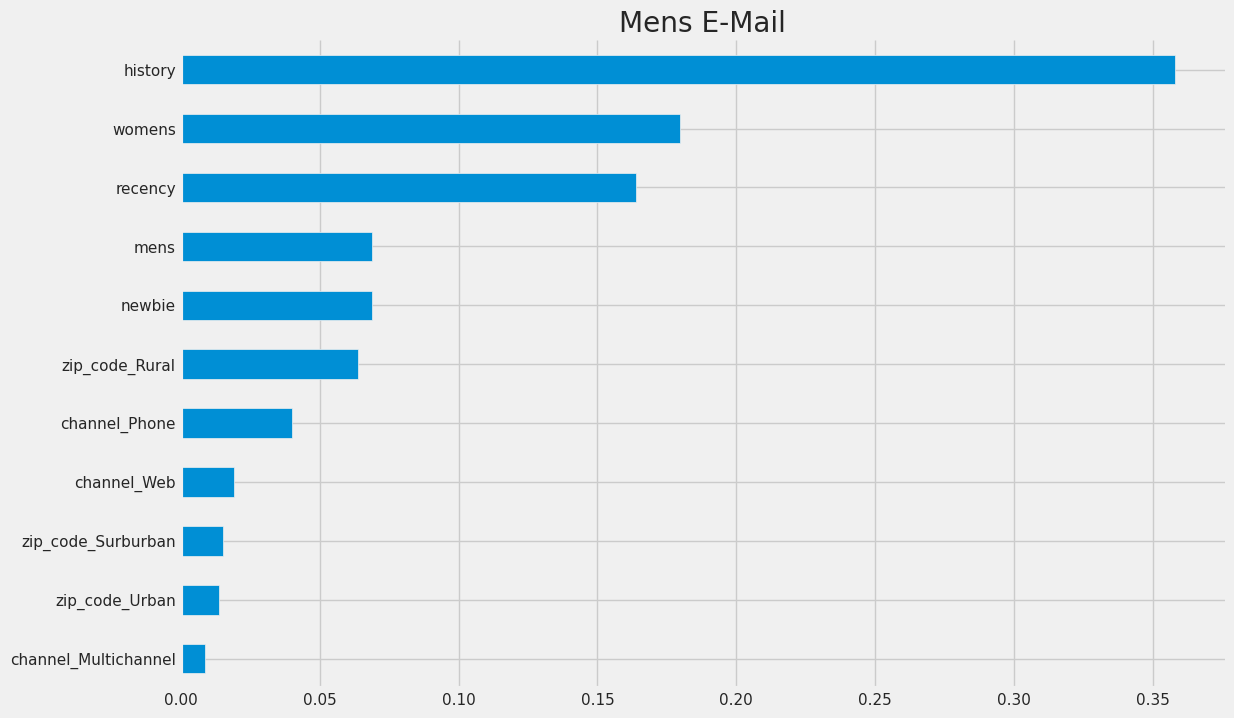

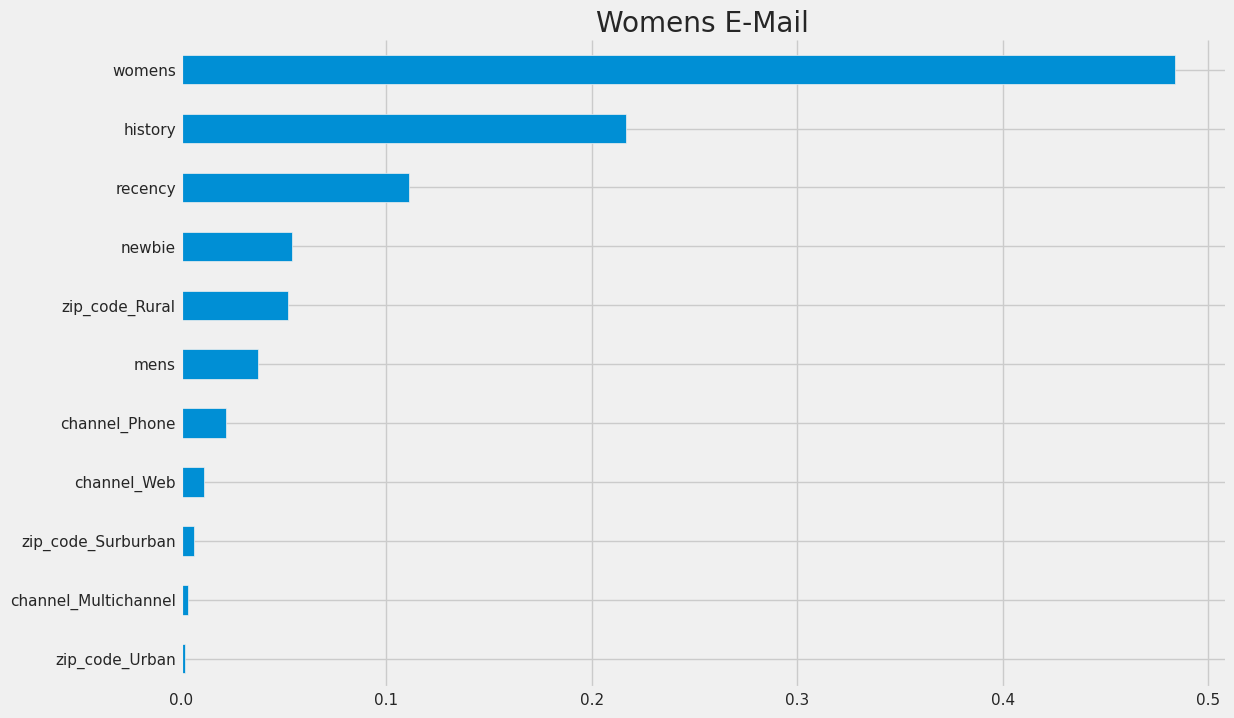

In [43]:
from sklearn.model_selection import train_test_split

from causalml.inference.meta import BaseSClassifier
from lightgbm import LGBMClassifier
import matplotlib.pyplot as plt
import time



# Instantiate the base algorithm with a classifier LGBM
base_algo = LGBMClassifier()
# base_algo = RandomForestClassifier()
# base_algo = LogisticRegression()

# Instantiate the S-learner with the classifier
slearner = BaseSClassifier(base_algo, control_name='No E-Mail')

# Estimate the Average Treatment Effect (ATE)
slearner.estimate_ate(X,
        treatment,
        y)

# Fit and predict the treatment effects
slearner_tau = slearner.fit_predict(X, treatment, y)

feature_names = ['recency', 'history', 'mens', 'womens', 'newbie', 'zip_code_Rural',
                 'zip_code_Surburban', 'zip_code_Urban', 'channel_Multichannel', 'channel_Phone', 'channel_Web']

# Feature importance can be done similarly
feature_importances = slearner.get_importance(X=X,
                                              tau=slearner_tau,
                                              normalize=True,
                                              method='auto',  features=feature_names
                                            )

# Plotting feature importance
slearner.plot_importance(X=X,
                         tau=slearner_tau,
                         normalize=True,
                         method='auto',  features=feature_names)



[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 2, number of used features: 0
[LightGBM] [Info] Start training from score 0.500000
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split

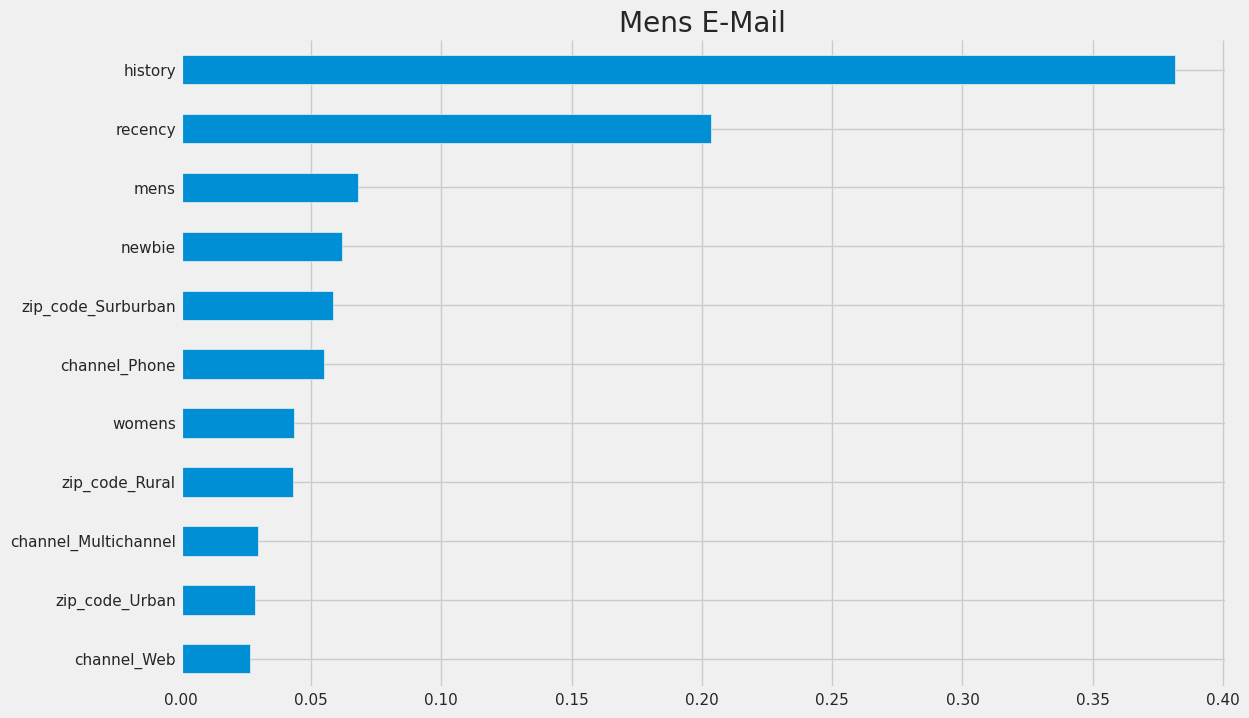

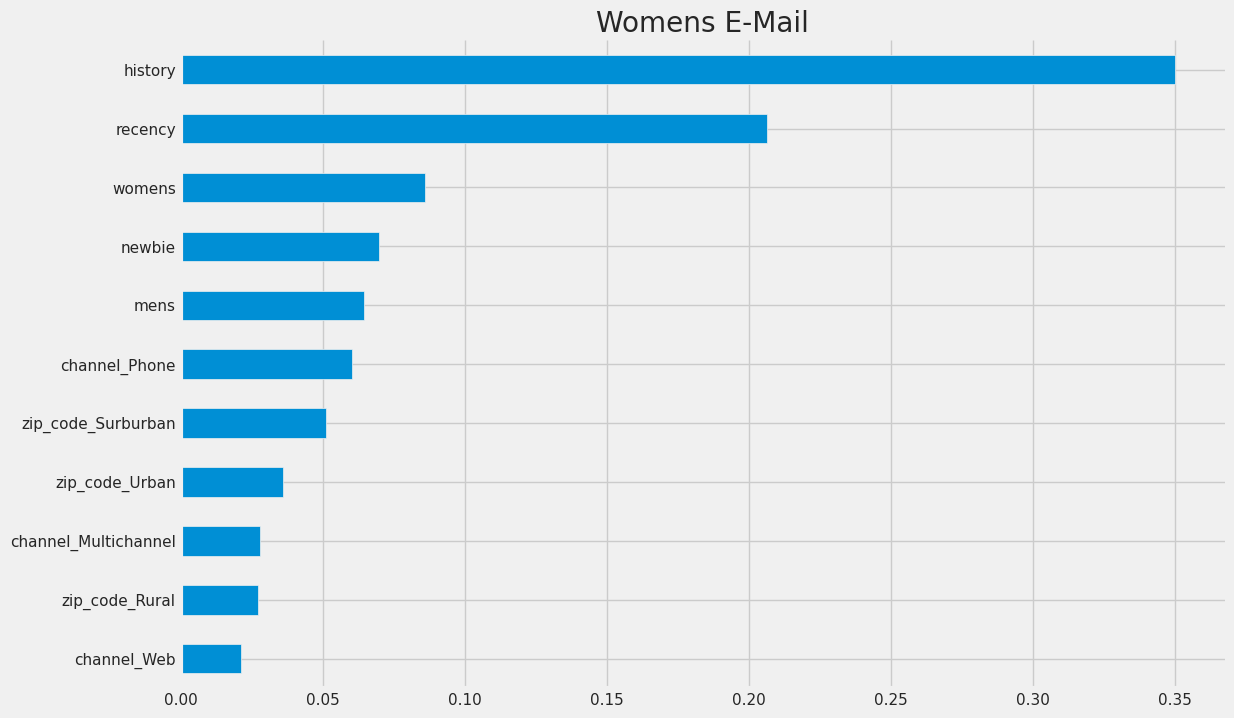

In [44]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

# Instantiate the base algorithm with a classifier - RandomForest
base_algo = RandomForestClassifier()
# base_algo = LogisticRegression()

# Instantiate the S-learner with the classifier
slearnerrando = BaseSClassifier(base_algo, control_name='No E-Mail')

# Estimate the Average Treatment Effect (ATE)
slearnerrando.estimate_ate(X,
        treatment,
        y)


# Fit and predict the treatment effects
slearnerrando_tau = slearnerrando.fit_predict(X, treatment, y)

feature_names = ['recency', 'history', 'mens', 'womens', 'newbie', 'zip_code_Rural',
                 'zip_code_Surburban', 'zip_code_Urban', 'channel_Multichannel', 'channel_Phone', 'channel_Web']

# Feature importance can be done similarly
feature_importances = slearnerrando.get_importance(X=X,
                                              tau=slearnerrando_tau,
                                              normalize=True,
                                              method='auto',  features=feature_names
                                            )

# Plotting feature importance
slearnerrando.plot_importance(X=X,
                         tau=slearnerrando_tau,
                         normalize=True,
                         method='auto',  features=feature_names)



### **Interpretation**

For "Mens E-Mail":

History: The most important predictor of men visiting the website after receiving an email is the actual dollar amount they spent in the past year. This suggests that higher spenders are more likely to engage with the website again.
Womens: The fact that this is a significant predictor indicates that men who have purchased women's merchandise in the past year are also likely to respond to the email campaign by visiting the website.
Recency: This suggests that the more recently a man has made a purchase, the more likely he is to visit the website after receiving an email campaign.
Mens: Men who have purchased men's merchandise in the past year have a moderate likelihood of visiting the website in response to the campaign.
Newbie: New customers are somewhat likely to visit the website, which suggests that the email campaign may be effective in engaging new customers.
Other features like the customer's location (zip_code) and the channels they've used (channel) seem to have less influence compared to the aforementioned features.
For "Womens E-Mail":

Womens: The strongest predictor for women visiting the website after receiving an email is whether they have purchased women's merchandise in the past year. This suggests that targeting women with relevant past purchases can be effective.
History: Similar to the mens' model, the actual dollar amount spent in the past year is a strong predictor of engagement with the website.
Recency: The timing of the last purchase plays a significant role, with more recent shoppers being more likely to visit the website.
Newbie: New female customers show moderate responsiveness to the email campaign in terms of website visits.
Other features related to merchandise type (mens), location (zip_code), and purchasing channels (channel) are less predictive of website visits in response to the campaign.
In summary, both for men and women, personalized content that aligns with their past purchase behavior, particularly the types of merchandise they have bought and the amount spent, is highly predictive of their likelihood to visit the website following an email campaign. Recency of purchases also plays a crucial role, with more recent customers being more engaged. New customers show some potential for engagement, suggesting that email campaigns can be an effective tool for nurturing these relationships. Location and purchase channel are less indicative of whether an individual will visit the website post-campaign.

**Comparing different classifiers**

For men's email:

History and Recency: All three models consider 'history' and 'recency' as important features, indicating these are consistently strong predictors across different types of models for whether men open an email or not.

Address Type (zip_code): There is some variation in how the models weigh the importance of the location type (rural, suburban, urban). For example, 'zip_code_Rural' and 'zip_code_Surburban' appear more important in the Logistic Regression model than in the LightGBM and RandomForest models.

Gender-specific Features (mens, womens): There is a difference in how the models treat gender-specific features. The Logistic Regression model gives more importance to 'womens' compared to the RandomForest model, while 'mens' is relatively important across all models but varies in degree.

Communication Channel (channel_Phone, channel_Web, channel_Multichannel): The importance of the communication channel also varies. For instance, 'channel_Phone' has a higher importance in the RandomForest model than in the Logistic Regression and LightGBM models.

New Customers (newbie): The 'newbie' feature is considered by all models, but its relative importance is different, with the RandomForest model giving it less importance compared to the Logistic Regression and LightGBM models.

The differences in feature importance across these models may arise from the distinct ways each model handles data and makes decisions:

* LightGBM can capture complex non-linear relationships between features and the target variable.
* Logistic Regression assumes a linear relationship between the log-odds of the dependent variable and the features.
* RandomForest is a non-linear model that can capture complex interactions between features but does not assume any specific functional form.

It's also important to remember that feature importance in tree-based models like LightGBM and RandomForest is based on how much each feature decreases the impurity of a split, while in Logistic Regression, the importance comes from the size of the feature coefficients, which represent the change in log-odds per unit change in the feature.

### T-learner Feature Importance

[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 2, number of used features: 0
[LightGBM] [Info] Start training from score 0.500000
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split

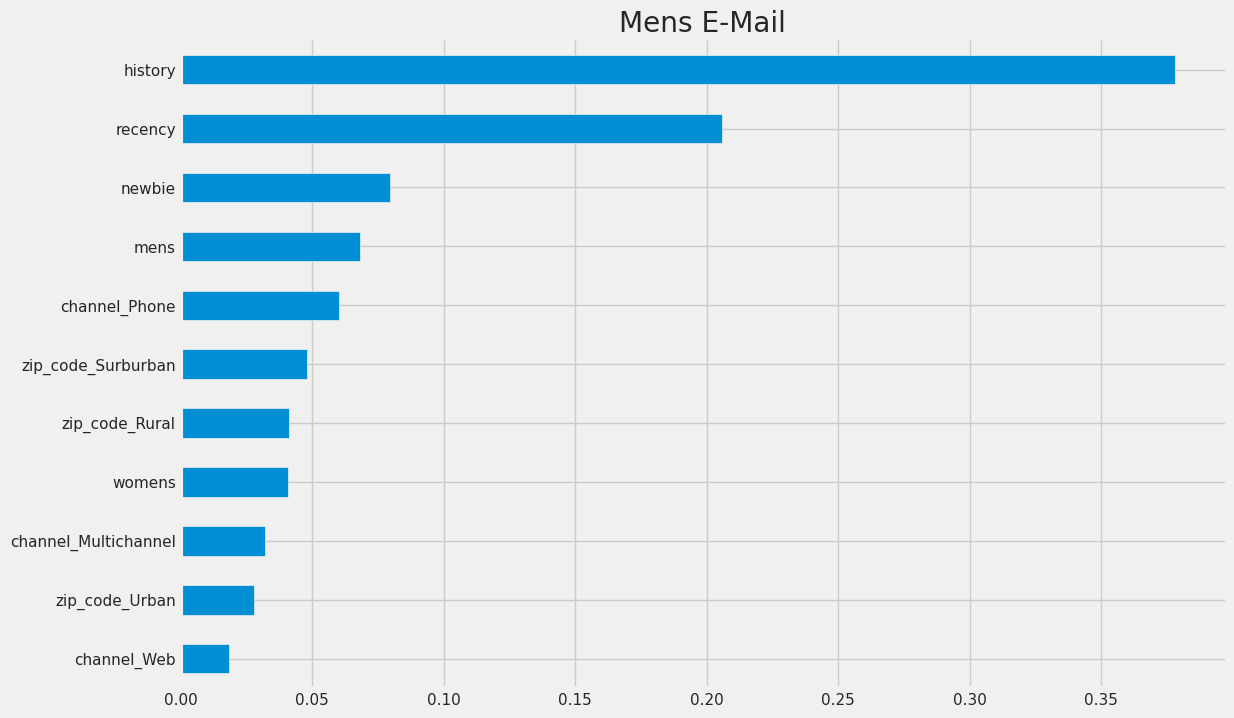

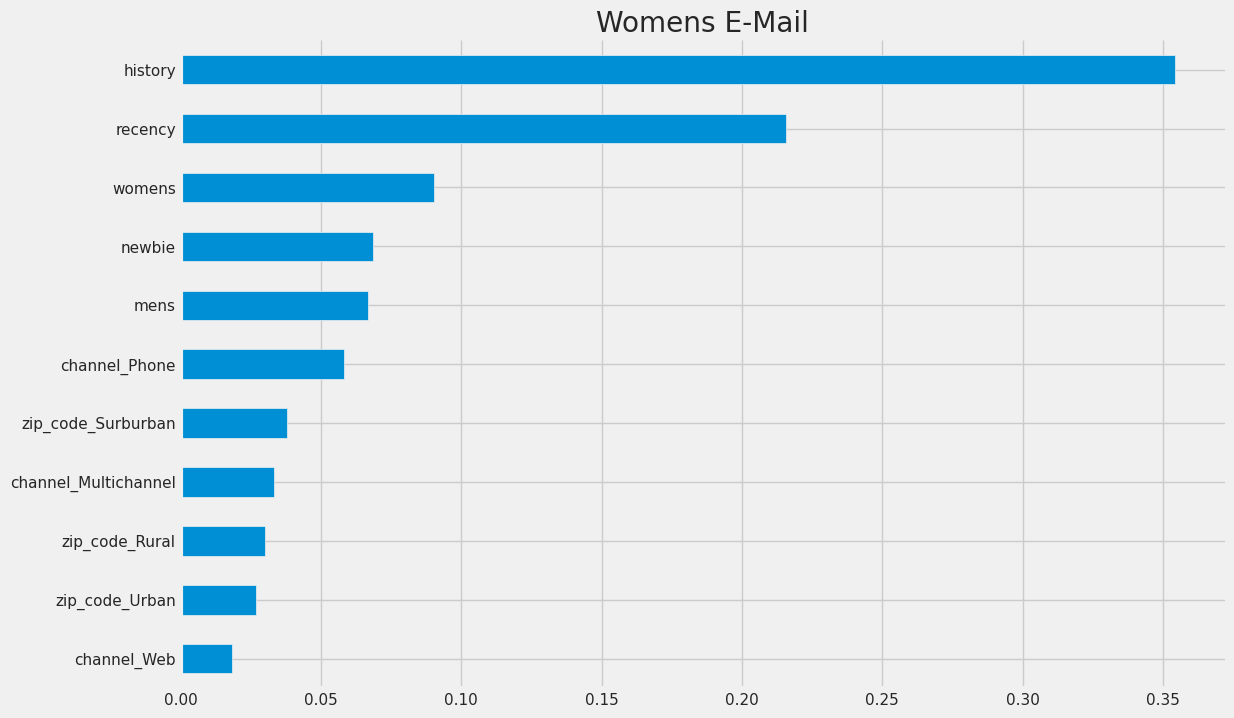

In [45]:
from causalml.inference.meta import BaseTClassifier
from sklearn.ensemble import RandomForestClassifier

# Instantiate the base algorithm with a classifier - RandomForest
base_algo = RandomForestClassifier()

# Instantiate the T-learner with the classifier
tlearner = BaseTClassifier(learner=base_algo, control_name='No E-Mail')

# Fit the T-learner to the data
# Make sure the `treatment` vector contains 'No E-Mail' where appropriate
tlearner.fit(X=X, treatment=treatment, y=y)

# Predict the treatment effects
tlearner_tau = tlearner.predict(X)

# Assuming `feature_names` is defined as before

# Feature importance can be done similarly
# Note: The `get_importance` method might differ; refer to causalml documentation for the correct method
feature_importances = tlearner.get_importance(X=X,
                                              tau=tlearner_tau,
                                              normalize=True,
                                              method='auto',  features=feature_names
                                            )

# Plotting feature importance
# Note: The `plot_importance` method might differ; refer to causalml documentation for the correct method
tlearner.plot_importance(X=X,
                         tau=tlearner_tau,
                         normalize=True,
                         method='auto',  features=feature_names)



### Difference between S- and T- learners

S-learner (Single Model Learner):

The S-learner uses a single model to estimate the treatment effect. This model includes the treatment indicator as an additional feature along with the other covariates.
It fits the model to predict the outcome based on all features and the treatment indicator.
The treatment effect is estimated by comparing the predictions with and without the treatment for the same unit.
It is a straightforward approach but may be less effective when the treatment effect is complex or varies substantially across different covariates.
The S-learner can be less efficient if the treatment effect is sparse or if there are interactions between the treatment and covariates that are not well captured by the model.
T-learner (Two Model Learner):

The T-learner uses two separate models to estimate the treatment effect: one model for the treatment group and one model for the control group.
Each model is fitted to its respective group to predict the outcome.
The treatment effect is estimated by taking the difference between the predictions of the treatment and control models for the same unit.
This approach can be more effective when the treatment effect is heterogeneous, as it allows for different relationships between the covariates and the outcome in the treatment and control groups.
However, the T-learner requires a sufficient number of observations in both the treatment and control groups to train two separate models effectively.
In summary, the S-learner is simpler and treats the treatment as an additional feature, while the T-learner captures potentially complex treatment effects by modeling the treatment and control groups separately.